**Step_1: Get the data of 20 companies from yahoo web and store in google drive**

In [1]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd
#datetime is a Python module
import datetime
import os 

# Set the start and end date
start_date = '2017-01-01'

#start_date = '2017-01-01'
# Get data to today
today = datetime.datetime.today()
# Set the list including 20'str' acronym of 20 companies
list = ['INTC','AMD', 'CSCO', 'AAPL', 'MU', 'NVDA', 'QCOM', 'AMZN', 'NFLX',
        'FB', 'GOOG', 'BABA', 'EBAY', 'IBM', 'XLNX', 'TXN', 'NOK', 'TSLA',
        'MSFT', 'SNPS']

# Get the data
files=[]

# Create a data folder in my google drive.
def SaveData(df, filename):
    os.makedirs("./Dataset/", exist_ok = True)
    df.to_csv('./Dataset/'+filename+'.csv')

def GetData(acronym):
    print (acronym)
    data = pdr.get_data_yahoo(acronym, start = start_date, end = today )
    dataname= acronym
    files.append(dataname)
    SaveData(data, dataname)

print("Today is " + str(today))
#Get data, and save that data as "str".csv
for i in list:
    GetData(i)

Today is 2021-07-18 22:54:47.658843
INTC
[*********************100%***********************]  1 of 1 completed
AMD
[*********************100%***********************]  1 of 1 completed
CSCO
[*********************100%***********************]  1 of 1 completed
AAPL
[*********************100%***********************]  1 of 1 completed
MU
[*********************100%***********************]  1 of 1 completed
NVDA
[*********************100%***********************]  1 of 1 completed
QCOM
[*********************100%***********************]  1 of 1 completed
AMZN
[*********************100%***********************]  1 of 1 completed
NFLX
[*********************100%***********************]  1 of 1 completed
FB
[*********************100%***********************]  1 of 1 completed
GOOG
[*********************100%***********************]  1 of 1 completed
BABA
[*********************100%***********************]  1 of 1 completed
EBAY
[*********************100%***********************]  1 of 1 completed
IBM
[**

### Requirement: 
30 ngày liên tiếp là input đầu vào của cột Adj => Predict ra cho ngày 31 

**Step_2: Working with LSTM model**

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM
import numpy as np
import time
from sklearn.model_selection import train_test_split

Read file csv

In [5]:
data = pd.read_csv("./Dataset/GOOG.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,778.809998,789.630005,775.799988,786.140015,786.140015,1657300
1,2017-01-04,788.359985,791.340027,783.159973,786.900024,786.900024,1073000
2,2017-01-05,786.080017,794.479980,785.020020,794.020020,794.020020,1335200
3,2017-01-06,795.260010,807.900024,792.203979,806.150024,806.150024,1640200
4,2017-01-09,806.400024,809.966003,802.830017,806.650024,806.650024,1274600
...,...,...,...,...,...,...,...
1137,2021-07-12,2596.669922,2615.399902,2592.000000,2611.280029,2611.280029,847200
1138,2021-07-13,2617.629883,2640.840088,2612.739990,2619.889893,2619.889893,830900
1139,2021-07-14,2638.030029,2659.919922,2637.959961,2641.649902,2641.649902,895600
1140,2021-07-15,2650.000000,2651.899902,2611.959961,2625.330078,2625.330078,829300


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1142 non-null   object 
 1   Open       1142 non-null   float64
 2   High       1142 non-null   float64
 3   Low        1142 non-null   float64
 4   Close      1142 non-null   float64
 5   Adj Close  1142 non-null   float64
 6   Volume     1142 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 62.6+ KB


In [7]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

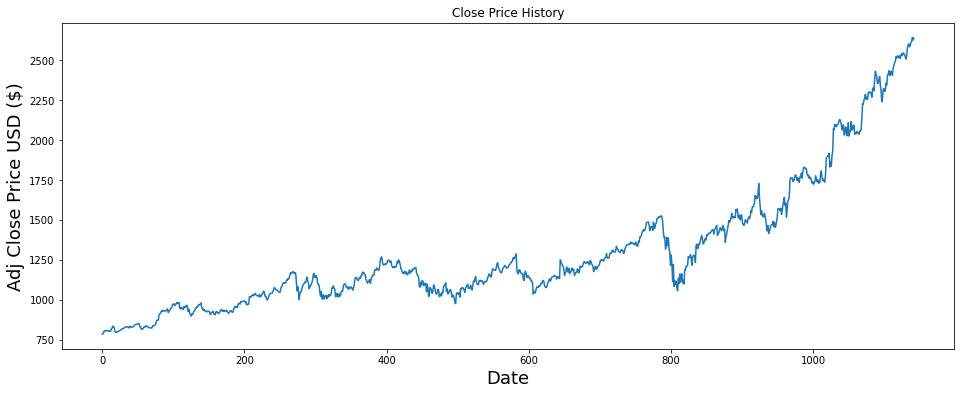

In [8]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(data['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.show()

Split data train/test

In [9]:
# Get norm
scaler = MinMaxScaler(feature_range=(0,1))

data_ = data.filter(['Close'])
scaled_data = scaler.fit_transform(data_)

scaled_data

array([[0.00000000e+00],
       [4.09596182e-04],
       [4.24681374e-03],
       ...,
       [1.00000000e+00],
       [9.91204669e-01],
       [9.97445451e-01]])

In [10]:
scaled_data.shape

(1142, 1)

In [11]:
# Split the data into x_train and y_train data sets
X = []
y = []

for i in range(30, scaled_data.shape[0]):
    X.append(scaled_data[i-30:i, 0])
    y.append(scaled_data[i, 0])

Building model

In [12]:
# Convert the x_train and y_train to numpy arrays 
X = np.array(X)
y = np.array(y)

# Reshape the data
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
X.shape

(1112, 30, 1)

In [13]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
start = time.time()
model.compile(optimizer='adam', loss='mean_squared_error')
print("> Compilation Time : ", time.time() - start)
print(model.summary())

> Compilation Time :  0.012698650360107422
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 128)           66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 25)                1625      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________
None


Training model

In [15]:
history = model.fit(X_train, y_train, epochs=60, 
                    validation_data=(X_validate,y_validate), 
                    shuffle=True, batch_size=16, verbose=2)

Epoch 1/60
56/56 - 6s - loss: 0.0053 - val_loss: 6.3228e-04
Epoch 2/60
56/56 - 2s - loss: 6.8380e-04 - val_loss: 7.0062e-04
Epoch 3/60
56/56 - 2s - loss: 7.2101e-04 - val_loss: 7.3295e-04
Epoch 4/60
56/56 - 2s - loss: 6.6579e-04 - val_loss: 6.3478e-04
Epoch 5/60
56/56 - 2s - loss: 6.5090e-04 - val_loss: 6.3198e-04
Epoch 6/60
56/56 - 2s - loss: 6.2434e-04 - val_loss: 6.1919e-04
Epoch 7/60
56/56 - 2s - loss: 5.4089e-04 - val_loss: 5.5894e-04
Epoch 8/60
56/56 - 2s - loss: 5.1368e-04 - val_loss: 4.0218e-04
Epoch 9/60
56/56 - 2s - loss: 4.6087e-04 - val_loss: 4.1839e-04
Epoch 10/60
56/56 - 2s - loss: 4.6556e-04 - val_loss: 5.9878e-04
Epoch 11/60
56/56 - 2s - loss: 5.4610e-04 - val_loss: 4.5097e-04
Epoch 12/60
56/56 - 2s - loss: 4.3361e-04 - val_loss: 7.0658e-04
Epoch 13/60
56/56 - 2s - loss: 3.7623e-04 - val_loss: 4.7122e-04
Epoch 14/60
56/56 - 2s - loss: 4.1696e-04 - val_loss: 2.9218e-04
Epoch 15/60
56/56 - 2s - loss: 4.3866e-04 - val_loss: 4.8293e-04
Epoch 16/60
56/56 - 2s - loss: 3.5951e

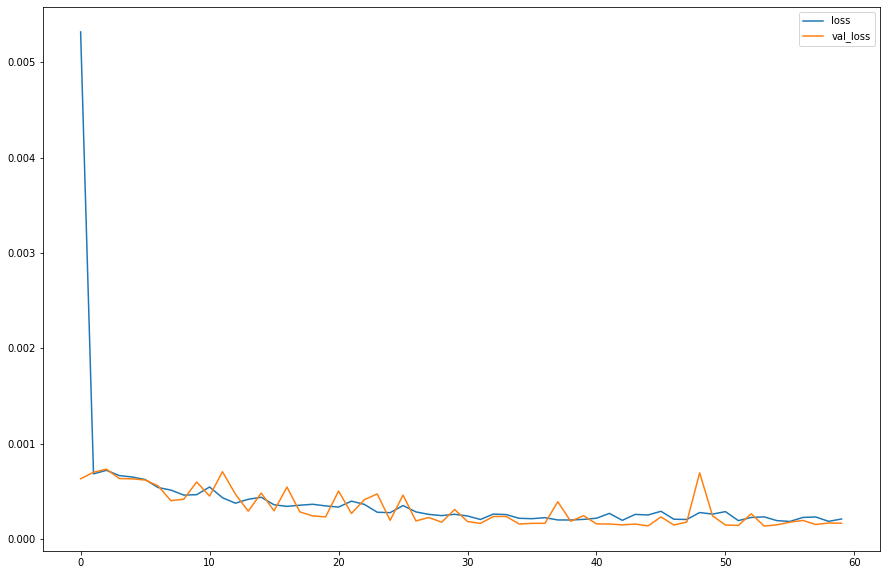

In [16]:
plt.figure(figsize = (15,10))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

**Step_3: Get results**

In [17]:
Xt = model.predict(X)

In [18]:
predict = []
for i in range(0,len(Xt)):
    predict.extend(scaler.inverse_transform(Xt[i].reshape(-1,1)))
predict

[array([817.8152], dtype=float32),
 array([817.7331], dtype=float32),
 array([820.61597], dtype=float32),
 array([824.3496], dtype=float32),
 array([827.9891], dtype=float32),
 array([828.7728], dtype=float32),
 array([829.15594], dtype=float32),
 array([827.65576], dtype=float32),
 array([827.3683], dtype=float32),
 array([823.7484], dtype=float32),
 array([829.4302], dtype=float32),
 array([829.54865], dtype=float32),
 array([828.12683], dtype=float32),
 array([826.6619], dtype=float32),
 array([828.6179], dtype=float32),
 array([831.7339], dtype=float32),
 array([834.95166], dtype=float32),
 array([838.8721], dtype=float32),
 array([841.7184], dtype=float32),
 array([842.6945], dtype=float32),
 array([843.8689], dtype=float32),
 array([845.32355], dtype=float32),
 array([847.9706], dtype=float32),
 array([846.7802], dtype=float32),
 array([835.11755], dtype=float32),
 array([829.5871], dtype=float32),
 array([821.0102], dtype=float32),
 array([815.836], dtype=float32),
 array([817.3

**Step_4: Check**

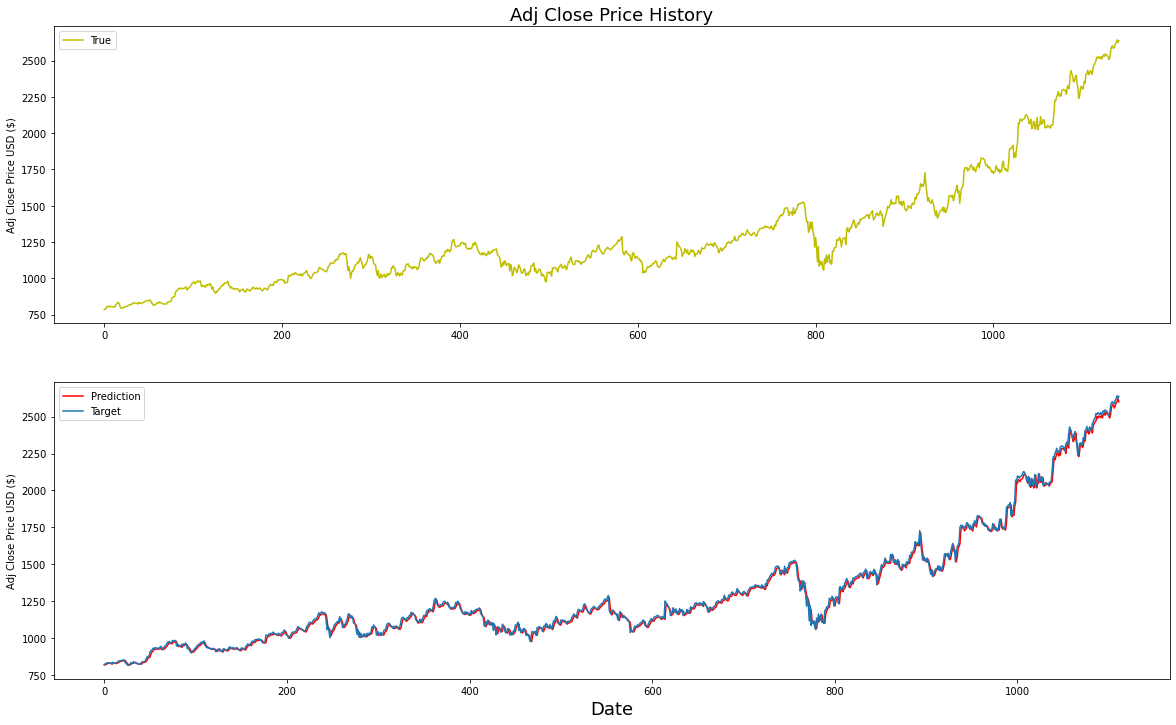

In [19]:
plt.figure(figsize=(20, 12))

plt.subplot(211)
plt.title('Adj Close Price History', fontsize=18)
plt.ylabel('Adj Close Price USD ($)')
plt.plot(data['Adj Close'], color='y', label='True')
plt.legend(loc='best')

plt.subplot(212)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)')
plt.plot(predict, color='r', label='Prediction')
plt.plot(scaler.inverse_transform(y.reshape(-1,1)), label='Target')
plt.legend(loc='best')

plt.show()